In [184]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from itertools import combinations
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [185]:
notebook_path = os.getcwd()
print(notebook_path)

D:\Pandas-Data-Science-Tasks-master_galli\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data


In [186]:
os.chdir('D:\Pandas-Data-Science-Tasks-master_galli\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')

In [187]:
notebook_path = os.getcwd()
print(notebook_path)

D:\Pandas-Data-Science-Tasks-master_galli\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data


In [188]:
# looking at first 5 rows to get an idea of the columns in the data:

df = pd.read_csv("Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


In [189]:
# printing list of files in the folder we will be working with:

files = [file for file in os.listdir('D:\Python_Pandas_Project\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]
                                     
for file in files:
      print(file)
                                     

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [190]:
# Creating empty dataframe to store our data:

all_months_data = pd.DataFrame()

In [191]:
# Concatenating files:

for file in files:
    df = pd.read_csv("../Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df]).drop_duplicates()

In [192]:
# creating a csv file of the data:

all_months_data.to_csv("all_months_data.csv",index = False)

In [193]:
# reading csv file:

all_months_data = pd.read_csv("all_months_data.csv")

In [194]:
# taking a look at top 5 rows of the data file:

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


In [195]:
# using info method to look at summary of the data:
 
all_months_data.info()

# there are null entries (NaN values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185688 entries, 0 to 185687
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [196]:
# dropping rows with NaN values:

all_months_data = all_months_data.dropna()
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185683,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185684,259354,iPhone,1,700.0,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
185685,259355,iPhone,1,700.0,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185686,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [197]:
# Converting datatypes:

# this gives " ValueError: invalid literal for int() with base 10: 'Quantity Ordered' " which shows that when concatenating the 
# files the column headers rows from all 12 files also got concatenated in the rows. We will get rid of those in the next step.


all_months_data["Quantity Ordered"].astype("int")

ValueError: invalid literal for int() with base 10: 'Quantity Ordered'

In [198]:
# Dropping unnecessary columns containing repeated column headers:

all_months_data = all_months_data[~all_months_data['Order Date'].str.contains('Order Date', na=False)]


In [199]:
# converting datatypes:

all_months_data["Quantity Ordered"] = all_months_data["Quantity Ordered"].astype("int")
all_months_data["Price Each"] = all_months_data["Price Each"].astype("float")
all_months_data["Order Date"]  =pd.to_datetime(all_months_data["Order Date"])


In [200]:
# Adding "month" column:

all_months_data["month"]  =all_months_data["Order Date"].dt.month

In [201]:
# Adding "Sales" column:

all_months_data["Sales"] = all_months_data["Quantity Ordered"] * all_months_data["Price Each"]
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [202]:
all_months_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
month                        int64
Sales                      float64
dtype: object

In [203]:
# Question 1: What was the best month for sales and how much was the revenue?


all_months_data.groupby("month").sum()["Sales"].sort_values(ascending=False)/1000000

# Answer: Best month for sales was December with $4.6 million in sales which makes sense as many people in USA buy presents
#         around Christmas and many stores run and promotions around Christmas and New Years Eve.

month
12    4.608296
10    3.734778
4     3.389218
11    3.197875
5     3.150616
3     2.804973
7     2.646461
6     2.576280
8     2.241083
2     2.200078
9     2.094466
1     1.821413
Name: Sales, dtype: float64

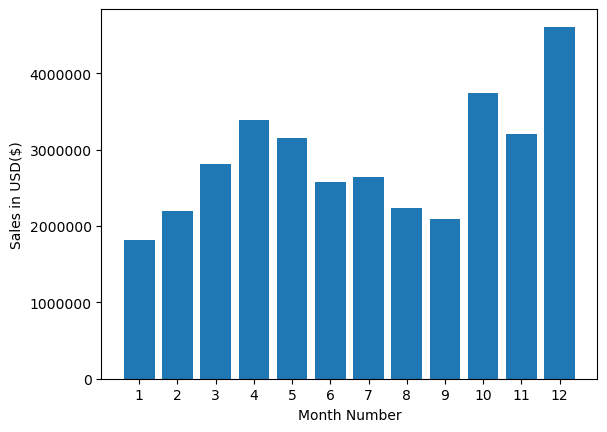

In [204]:
# Plotting a bar chart (Sales vs Month)

results = all_months_data.groupby('month').sum()

months = range(1,13)

plt.bar(months,results['Sales'])

plt.ticklabel_format(axis='y', style='plain')

plt.xticks(months)

plt.xlabel("Month Number")

plt.ylabel("Sales in USD($)")

plt.show()

In [205]:
# Question 2: What USA city had the highest number of sales?

# Creating city column:

def city(address):
    return address.split(',')[1]

def state(address):
    return address.split(',')[2].split(' ')[1]

all_months_data["City"]  = all_months_data["Purchase Address"].apply(lambda x: city(x)+", "+state(x) )

In [206]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...
185683,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,"Los Angeles, CA"
185684,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,"San Francisco, CA"
185685,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,"San Francisco, CA"
185686,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,"San Francisco, CA"


In [207]:
# Grouping by cities and summing Sales:

all_months_data.groupby("City").sum()["Sales"].sort_values(ascending=False)/1000000

# Answer(Question 2): San Francisco has the highest sales with $8.25 million sales

City
 San Francisco, CA    8.254744
 Los Angeles, CA      5.448304
 New York City, NY    4.661867
 Boston, MA           3.658628
 Atlanta, GA          2.794199
 Dallas, TX           2.765374
 Seattle, WA          2.745046
 Portland, OR         1.870011
 Austin, TX           1.818044
 Portland, ME         0.449321
Name: Sales, dtype: float64

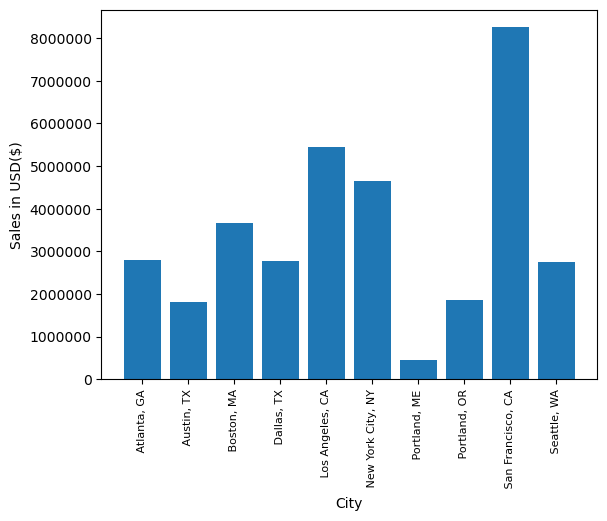

In [208]:
# Plotting a bar chart (Sales vs City)

results_by_city = all_months_data.groupby('City').sum()

cities= [city for city,df in all_months_data.groupby('City')]

plt.bar(cities,results_by_city['Sales'])

plt.xticks(cities,rotation='vertical',size=8)

plt.ticklabel_format(axis='y', style='plain')

plt.ylabel("Sales in USD($)")

plt.xlabel('City')

plt.show()



In [209]:
# Question 3: At what time should advertisments be displayed to maximize customer's chances of buying products?

In [210]:
# Creating hour and minute colums

all_months_data['Hour'] = all_months_data["Order Date"].dt.hour
all_months_data['Minute'] = all_months_data["Order Date"].dt.minute

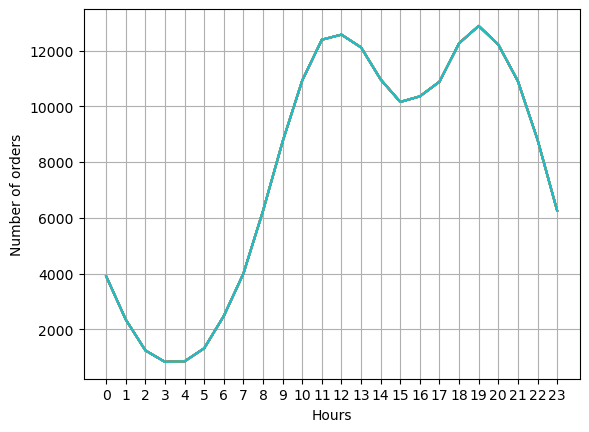

In [211]:
# Plotting a line chart (number of orders vs hour)

hours= [hour for hour,df in all_months_data.groupby('Hour')]

plt.plot(hours,all_months_data.groupby(['Hour']).count())

plt.xticks(hours)

plt.xlabel("Hours")

plt.ylabel("Number of orders")

plt.grid()

plt.show()

# Answer(Question 3): The best time to show ads is around 12 p.m. and 7 p.m.

In [212]:
# Question 4 :  which product combinations were most sold together:

df=all_months_data[all_months_data["Order ID"].duplicated(keep=False)]

In [213]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",19,42
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles, CA",19,42
30,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,"San Francisco, CA",17,0
...,...,...,...,...,...,...,...,...,...,...,...
185631,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,"Atlanta, GA",20,18
185642,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,"Atlanta, GA",0,25
185643,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,"Atlanta, GA",0,25
185679,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,"San Francisco, CA",13,49


In [214]:
# Create grouped column of products with same Order ID:

df["Grouped"] = df.groupby("Order ID")['Product'].transform(lambda x: ','.join(x))

In [215]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute,Grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",19,42,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles, CA",19,42,"Google Phone,USB-C Charging Cable"
30,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,"San Francisco, CA",17,0,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...,...,...
185631,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,"Atlanta, GA",20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
185642,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,"Atlanta, GA",0,25,"Wired Headphones,AAA Batteries (4-pack)"
185643,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,"Atlanta, GA",0,25,"Wired Headphones,AAA Batteries (4-pack)"
185679,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,"San Francisco, CA",13,49,"Google Phone,USB-C Charging Cable"


In [216]:
# create a dataframe with only two columns Order ID and Grouped and drop duplicate rows:

df = df[["Order ID","Grouped"]].drop_duplicates()

In [217]:
df

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
30,176586,"AAA Batteries (4-pack),Google Phone"
117,176672,"Lightning Charging Cable,USB-C Charging Cable"
127,176681,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...
185602,259277,"iPhone,Wired Headphones"
185623,259297,"iPhone,Lightning Charging Cable"
185630,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
185642,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [218]:
count = Counter()

for row in df["Grouped"]:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

In [219]:
# Answer (Question 4): Below are the top 10 most sold product combinations:

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 159),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [220]:
#  Question 5: What product sold the most?

In [221]:
all_months_data.groupby("Product").sum().sort_values("Quantity Ordered",ascending=False)

# Answer (Question 5): AAA Batteries (4-pack) sold the most with 30986 orders.

,Quantity Ordered,Price Each,month,Sales,Hour,Minute
Product,,,,,,
AAA Batteries (4-pack),30986,61629.88,146149,92648.14,296904,611350
AA Batteries (4-pack),27615,78942.72,145423,106041.60,298077,608560
USB-C Charging Cable,23931,261215.05,154520,285975.45,313980,646428
Lightning Charging Cable,23169,323069.50,152741,346376.55,311815,632915
Wired Headphones,20524,225999.51,133123,246082.76,271245,552928
Apple Airpods Headphones,15637,2328750.00,109304,2345550.00,222938,454935
Bose SoundSport Headphones,13430,1329667.02,93918,1342865.70,192077,391667
27in FHD Monitor,7541,1124625.02,52484,1131074.59,107422,219659
iPhone,6847,4788000.00,47933,4792900.00,98617,201604


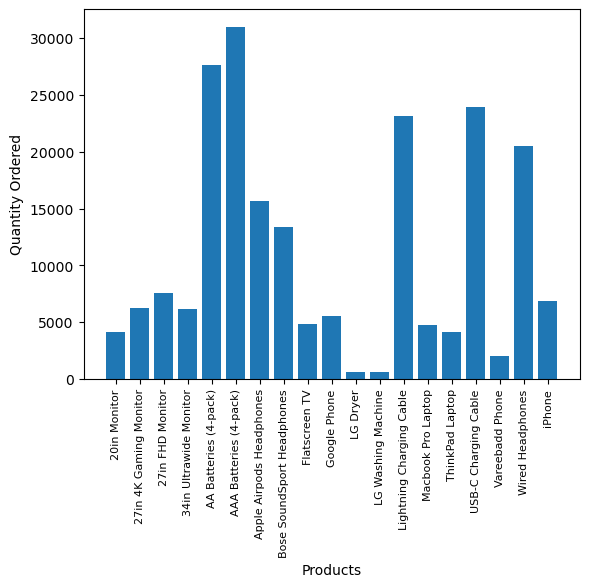

In [222]:
product_group  =all_months_data.groupby('Product')

quantity_ordered = all_months_data.groupby("Product").sum()["Quantity Ordered"]

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.xlabel("Products")

plt.ylabel('Quantity Ordered')

plt.xticks(products,rotation='vertical',size=8)

plt.show()

In [230]:
prices = all_months_data.groupby("Product").mean()["Price Each"]

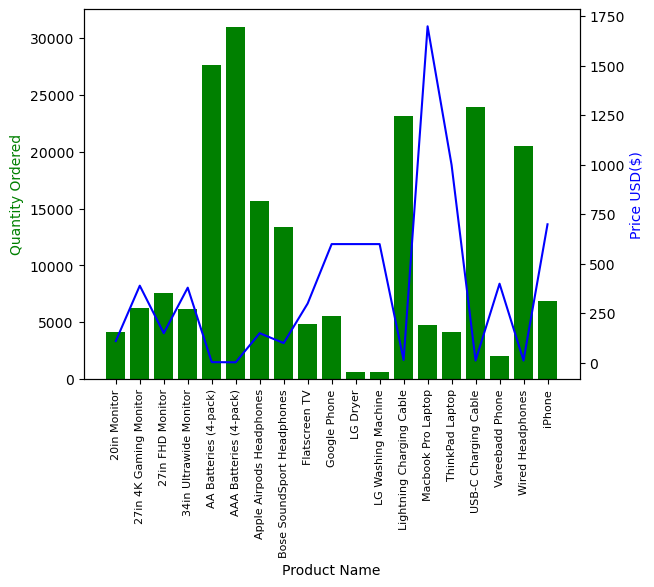

In [231]:
# Plotting Quantity Ordered and Price for products on the same graph:

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price USD($)', color='b')

ax1.set_xticklabels(products,rotation='vertical',size=8)

plt.show()